### NAME: Taiwo Toluwalase Princess
### PROJECT: Data Visualization Assignment

Create a joint plot using Seaborn visualization module
- The data must be from the seaborn data repository and feel free to use any parameters.

In [1]:
#importing packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#func to get dataset names
datasets = sns.get_dataset_names()

#loop through the dataset in sns
for data in datasets:
    print(data)

if 'healthexp' in datasets:
    print('the healthexp dataset is available')
else:
    print('the healthexp dataset is not available')

anagrams
anscombe
attention
brain_networks
car_crashes
diamonds
dots
dowjones
exercise
flights
fmri
geyser
glue
healthexp
iris
mpg
penguins
planets
seaice
taxis
tips
titanic
the healthexp dataset is available


### About the `healthexp dataset`

 The Healthexp dataset contain data about:


| Column Name       | Description                                                    |
| ----------------- | -------------------------------------------------------------- |
| `Year`            | The year the data was recorded                                 |
| `Country`         | The name of the country                                        |
| `Spending_USD`    | Health care spending per person (usually in U.S. dollars)      |
| `Life_Expectancy` | The average life expectancy in that country for the given year (1970-2020) |


In [3]:
#loading healthexp
healthexp = sns.load_dataset('healthexp')
healthexp.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [4]:
#summary statistics of dataset
healthexp.describe()

,Year,Spending_USD,Life_Expectancy
count,274.000000,274.000000,274.000000
mean,1996.992701,2789.338905,77.909489
std,14.180933,2194.939785,3.276263
min,1970.000000,123.993000,70.600000
25%,1985.250000,1038.357000,75.525000
50%,1998.000000,2295.578000,78.100000
75%,2009.000000,4055.610000,80.575000
max,2020.000000,11859.179000,84.700000


In [5]:
#check for null values
healthexp.isnull().sum()

Year               0
Country            0
Spending_USD       0
Life_Expectancy    0
dtype: int64

### Creating a `jointplot` using `seaborn` visualization module

A jointplot is a visualization tool in Seaborn used to explore the relationship between two continuous variables, combining a scatter plot with histograms (or other plots) to show both joint and individual distributions.

#### Simple jointplot
In the simplest sns `jointplot`, assigning `x` and `y` creates a scatter plot in the center (e.g., between `Spending_USD` and `Life_Expectancy`), along with marginal histograms — one at the top and another on the right side.

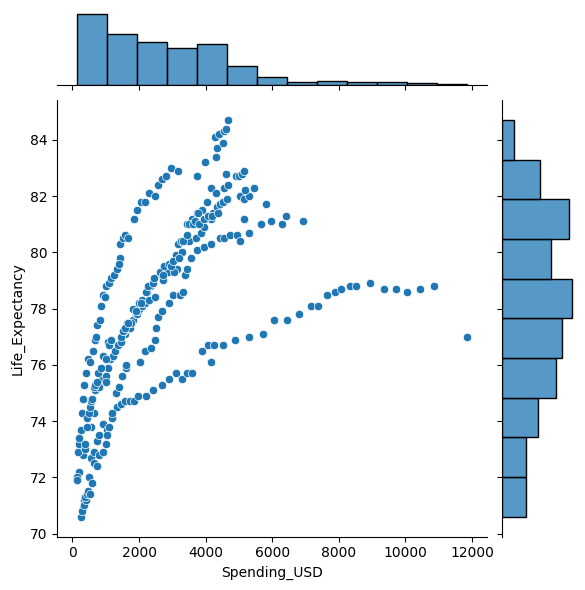

In [6]:
sns.jointplot(
    data=healthexp, 
    x="Spending_USD", 
    y="Life_Expectancy"
)
plt.savefig('jointplot_basic.png')

#### Jointplot with regression line

I explored further and used a version of jointplot with a regression line to better interpret the visualization.

`Center` – The scatter plot shows that as health spending increases, life expectancy also increases. But the way the dots form a banana shape around the line of best fit shows that the life expectancy gain (the benefit) becomes smaller at higher spending levels. In simple terms, more spending doesn’t always mean much longer life.

`Top` – The histogram of `Spending_USD` shows that most countries spend around `$5,000` per person each year, while a few countries like the USA (outliers) spend far more.

`Side` – The histogram of `life expectancy` looks like a gentle hill or bell shape, with most countries falling around the average of `77.9` years. Very few countries are at the low end (`70.6 years`) or the high end (`84.7 years`).

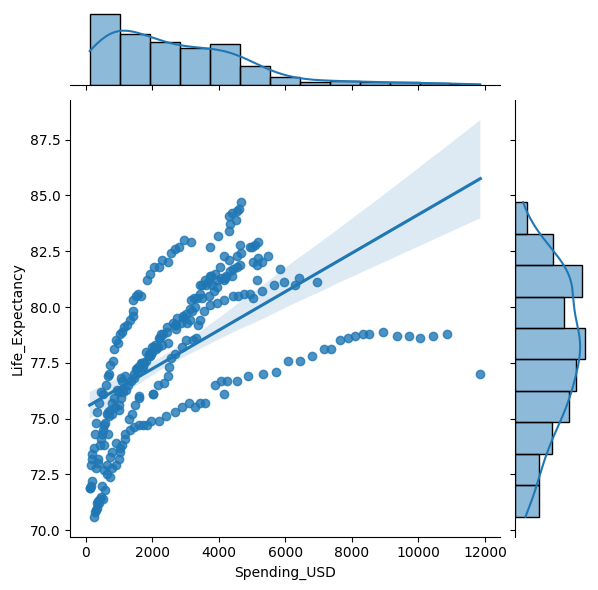

In [7]:
#adding a regression line to the plot
sns.jointplot(
    data=healthexp, 
    x="Spending_USD", 
    y="Life_Expectancy", 
    kind = 'reg'
)
plt.savefig('jointplot_reg.png')

#### jointplot with `hue="Country"`

I explored the data using a version of `jointplot` with `hue="Country"` to better understand the relationship between health spending and life expectancy.

`Center` – The `scatter plot` shows that countries that spend more on health generally have higher life expectancy. The dots form a banana-like curve, suggesting that while spending helps, the benefit becomes smaller as spending increases — more money doesn’t always mean much longer life.

`Top & Side` – Adding hue="Country" changes the side histograms to smooth KDE curves, with each country shown in a different color. This helps visualize how countries are spread out in terms of health spending and life expectancy, even though each one appears only once.

The life expectancy KDE curve forms a gentle hill, with most countries around an average of `77.9 years`, and fewer countries at the low end (`70.6 years`) or high end (`84.7 years`). Health spending mostly clusters around `$5,000`, with outliers like the USA spending significantly more.



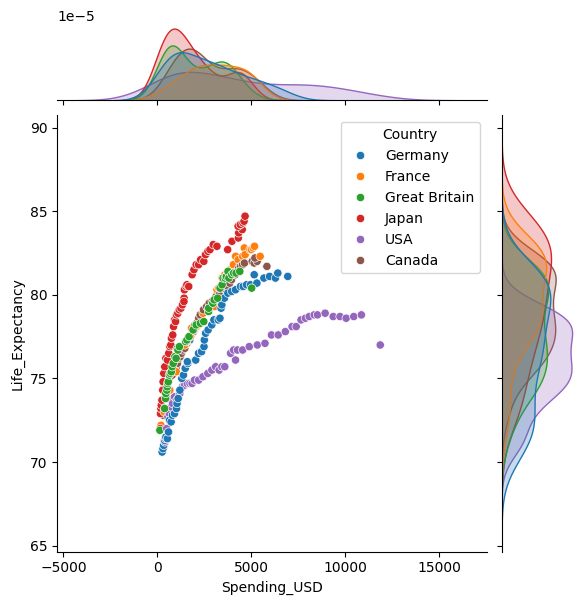

In [8]:
sns.jointplot(
    data=healthexp, 
    x="Spending_USD", 
    y="Life_Expectancy", 
    hue='Country'
)
plt.savefig('jointplot_hue.png')

#### applying logscale to `spending_USD`

I used jointplot with `hue="Country"` and applied a `log scale` to `Spending_USD` to better explore the relationship between `health spending` and `life expectancy`.

The `scatter plot` shows a clearer upward trend — the `log scale` straightens the banana shape, forming upward clusters. `Japan` and `France` stand out with high life expectancy despite moderate spending, while the `US` still appears as a visible outlier, though less extreme.

The side `KDE plots` (from hue) help show how countries are distributed. The log scale makes patterns easier to see without completely flattening out large spenders.

Life expectancy forms a gentle hill, with most countries around `80` years, and spending clustering around the mid-range on the log scale.

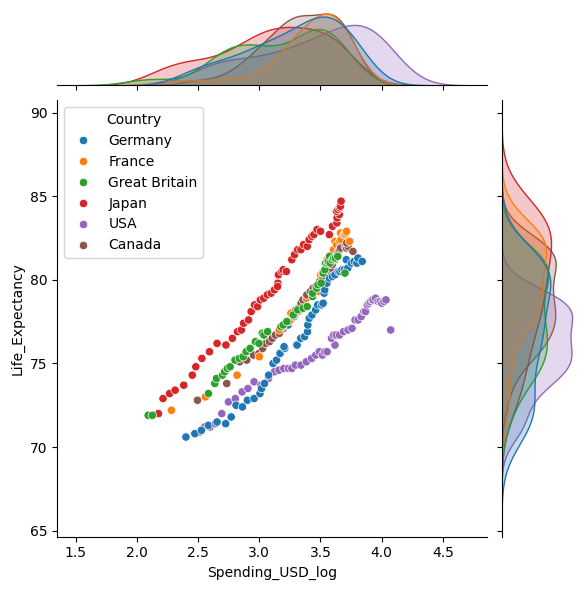

In [9]:
healthexp["Spending_USD_log"] = np.log10(healthexp["Spending_USD"])
sns.jointplot(
    data=healthexp, 
    x="Spending_USD_log", 
    y="Life_Expectancy", 
    hue='Country'
)
plt.savefig('jointplot_log_hue.png')

#### Key Insights from the Visualization
- More health spending generally leads to longer life expectancy, but the benefit becomes smaller at higher spending levels — more money doesn’t always mean much longer life.

- Using a log scale on spending reveals clearer patterns, straightening the scatterplot and making trends easier to interpret.

- Japan has high life expectancy between 1970-2020 without being top spenders, suggesting factors beyond spending impact outcomes.

- The United States remains a visible outlier — it spends far more but doesn’t have the highest life expectancy, raising questions about spending efficiency.

- Life expectancy follows a bell-shaped distribution, with most countries averaging around 77.9 years.

- Health spending (on the log scale) clusters in the mid-range, showing that most countries spend moderately, with only a few outliers like the US spending much more.

- Using hue="Country" enhances the visual by showing how individual countries are spread, though it's more useful for a small number of countries.